<a href="https://colab.research.google.com/github/viett887g/thongkesuydienpython/blob/main/kiemdinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy
import statistics
from scipy import stats
import seaborn as sns 
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df=  pd.read_csv("/content/gdrive/MyDrive/Diet_R.csv.csv")

In [ ]:
print(df)

    Person  gender  Age  Height  pre.weight  Diet  weight6weeks
0       25     NaN   41     171          60     2          60.0
1       26     NaN   32     174         103     2         103.0
2        1     0.0   22     159          58     1          54.2
3        2     0.0   46     192          60     1          54.0
4        3     0.0   55     170          64     1          63.3
..     ...     ...  ...     ...         ...   ...           ...
73      74     1.0   35     183          83     3          80.2
74      75     1.0   49     177          84     3          79.9
75      76     1.0   28     164          85     3          79.7
76      77     1.0   40     167          87     3          77.8
77      78     1.0   51     175          88     3          81.9

[78 rows x 7 columns]


In [5]:
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
7,6,0.0,50,201,66,1,64.0
8,7,0.0,37,174,67,1,65.0
9,8,0.0,28,176,69,1,60.5


In [6]:
df.copy().drop([0, 1]).set_index('Person')
lit = df.copy().drop([0, 1]).set_index('Person').sort_index()
print(lit.head(10))

        gender  Age  Height  pre.weight  Diet  weight6weeks
Person                                                     
1          0.0   22     159          58     1          54.2
2          0.0   46     192          60     1          54.0
3          0.0   55     170          64     1          63.3
4          0.0   33     171          64     1          61.1
5          0.0   50     170          65     1          62.2
6          0.0   50     201          66     1          64.0
7          0.0   37     174          67     1          65.0
8          0.0   28     176          69     1          60.5
9          0.0   28     165          70     1          68.1
10         0.0   45     165          70     1          66.9


In [7]:
data1= lit["pre.weight"]
data2= lit["weight6weeks"]

giải thuyết Ho
$$ H_{0} : μ0=μ1 $$ Cân nặng trung bình của trước và sau khi giảm cân là như nhau

giả thuyết thay thế
$$H_{a} : μ0≠μ1 $$
 Cân nặng trung bình của trước và sau khi giảm cân khác nhau

In [8]:
alpha= 0.05
data = stats.ttest_ind(data1,data2,equal_var=True)
print(data)
if data[1]<alpha:
  print("có đủ bằng chứng để bác bỏ giả thuyết Ho")
else:
  print("chưa có đủ bằng chứng để bác bỏ giả thuyết Ho")

Ttest_indResult(statistic=3.0342255247628476, pvalue=0.0028431949414180584)
có đủ bằng chứng để bác bỏ giả thuyết Ho


Remove weight lost and get students to calculate it using before/after weights

In [9]:
lit.insert(6, 'lostweight', data1-data2)
lit.head(5)

,gender,Age,Height,pre.weight,Diet,weight6weeks,lostweight
Person,,,,,,,
1,0.0,22,159,58,1,54.2,3.8
2,0.0,46,192,60,1,54.0,6.0
3,0.0,55,170,64,1,63.3,0.7
4,0.0,33,171,64,1,61.1,2.9
5,0.0,50,170,65,1,62.2,2.8


Text(0.5, 1.0, 'Truoc khi giam can va sau khi giam can')

<Figure size 288x432 with 0 Axes>

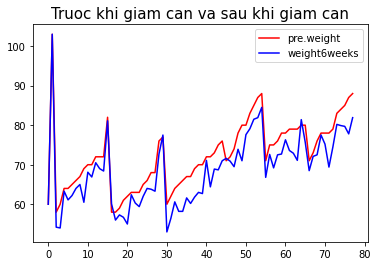

In [10]:
plt.figure(figsize=(4, 6))
df[['pre.weight', 'weight6weeks']].plot(color= ['red', 'blue'])
plt.title('Truoc khi giam can va sau khi giam can', fontsize=15)

Summary statistics by diet

In [11]:
data3= lit["Diet"]
print(data3.describe())

count    76.000000
mean      2.039474
std       0.823663
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64


      nguoi      ti le
Diet                  
1        24  30.769231
2        27  34.615385
3        27  34.615385


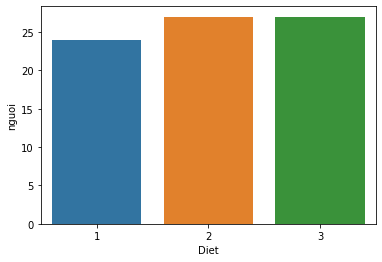

In [12]:
a = df.groupby('Diet')['Diet'].count()
b = pd.DataFrame(a)
b.columns = ['nguoi']
b['ti le'] = b/sum(b['nguoi'])*100
print(b)

b.reset_index(inplace=True)
bieudo =sns.barplot(x='Diet',y='nguoi',data = b)

ANOVA

In [13]:
data1 = lit.loc[lit['Diet']==1]['lostweight'].tolist()
data2 = lit.loc[lit['Diet']==2]['lostweight'].tolist()
data3= lit.loc[lit['Diet']==3]['lostweight'].tolist()
len(data1), len(data2), len(data3)

(24, 25, 27)

(1) Tất cả các nhóm đều độc lập với nhau

In [14]:
del data2[24:25]
del data3[24:27]

Dữ liệu của mỗi nhóm đều tuân theo phân phối chuẩn. Tính chất này có thể được kiểm định bằng phương pháp Shapiro-Wilks.

giải thuyết Ho
 H_{0} :  data1 đã tuân theo phân phối chuẩn

giả thuyết thay thế
H_{a} : data 1 chưa theo phân phối chuẩn

In [15]:
dat_test =stats.shapiro(data1)

if dat_test[1]<alpha:
  print("có đủ bằng chứng để bác bỏ giả thuyết Ho")
else:
  print("chưa có đủ bằng chứng để bác bỏ giả thuyết Ho")

chưa có đủ bằng chứng để bác bỏ giả thuyết Ho


giải thuyết
H_{0} :  
data2 đã tuân theo phân phối chuẩn

giả thuyết thay thế
H_{a} : 

data2 chưa theo phân phối chuẩn

In [16]:
dat_test =stats.shapiro(data2)

if dat_test[1]<alpha:
  print("có đủ bằng chứng để bác bỏ giả thuyết Ho")
else:
  print("chưa có đủ bằng chứng để bác bỏ giả thuyết Ho")

chưa có đủ bằng chứng để bác bỏ giả thuyết Ho


giải thuyết Ho
 H_{0} :  
data3 đã tuân theo phân phối chuẩn

giả thuyết thay thế
H_{a} : 

data3 chưa theo phân phối chuẩn

In [17]:
dat_test =stats.shapiro(data3)

if dat_test[1]<alpha:
  print("có đủ bằng chứng để bác bỏ giả thuyết Ho")
else:
  print("chưa có đủ bằng chứng để bác bỏ giả thuyết Ho")

chưa có đủ bằng chứng để bác bỏ giả thuyết Ho


Phương sai (variance) của các nhóm bằng nhau. Tính chất này có thể được kiểm định bằng phương pháp kiểm định Bartlett hay Levene.

In [18]:
test1 = stats.bartlett(data1, data2,data3)
print(test1)
if test1[1] < alpha :
    print("co bang chung de bac bo gia thuyet H0")
else:
    print("khong co gia thuyet de bac bo gia thuyet H0")

BartlettResult(statistic=0.28733374560171415, pvalue=0.8661762468702207)
khong co gia thuyet de bac bo gia thuyet H0


Kiểm định ANOVA


giải thuyết Ho
$$ H_{0} : μ1=μ2=μ3 $$
 
giải thuyết thay thế
H_{a} : có tồn tại ít nhất một cặp có giá trị trung bình khác nhau.

In [19]:
from scipy.stats import f_oneway

f_test = f_oneway(data1, data2, data3)
if f_test[1]<alpha:
  print("có đủ bằng chứng để bác bỏ giả thuyết H0")
else:
  print("chưa có đủ bằng chứng để bác bỏ giả thuyết H0")

có đủ bằng chứng để bác bỏ giả thuyết H0


Text(0, 0.5, 'Count')

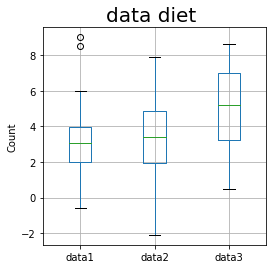

In [20]:
plt.figure(figsize=(4, 4))
plt.title('data diet ', fontsize=20)
pd.DataFrame({'data1': data1, 'data2': data2, 'data3': data3}).boxplot()
plt.ylabel('Count', fontsize=10)

Add height to either ANOVA

In [27]:
baz = lit[['Height', 'gender', 'Diet', 'lostweight']]
baz

,Height,gender,Diet,lostweight
Person,,,,
1,159,0.0,1,3.8
2,192,0.0,1,6.0
3,170,0.0,1,0.7
4,171,0.0,1,2.9
5,170,0.0,1,2.8
...,...,...,...,...
74,183,1.0,3,2.8
75,177,1.0,3,4.1
76,164,1.0,3,5.3


In [ ]:
from pingouin import ancova
ancova(data=df, dv='lostweight', covar='Height', between='Diet')